<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS1: Primeros pasos en la simulación
#### Pablo Romero


# Introducción
Primeros pasos en la creacion de funciones en python.
Vamos a jugar con la libreria numpy para generar distintas señales variando sus parametros
Señales logradas: sen(),cos(),step() y ramp().
Se trataron de hacer operaciones entre señales de manera muy rudimentaria. Algo se logró.



In [2]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

import matplotlib.pyplot as plt


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################

vmax=1          #Amplitud Maxima [Volts]
dc=0            #Valor de continua [Volts]
ff=10           #Frecuencia en [Hz][]
ph=np.pi*1   #Fase [rad]
nn=1000         #Muestras del ADC
fs=1000       #Frecuencia de muestreio del ADC [Hz]         
# Ts=1/Fs


def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    tt = np.arange(0.0, nn/fs, 1/fs)
    xx = (np.sin(2*np.pi*ff*tt+ph))*vmax + dc
    return tt,xx

def mi_funcion_cos(vmax, dc, ff, ph, nn, fs):
    tt = np.arange(0.0, nn/fs, 1/fs)
    xx = (np.cos(2*np.pi*ff*tt+ph))*vmax + dc
    return tt,xx

def mi_funcion_step(vmax, dc, ff, ph, nn, fs):
    tt = np.arange(0.0, nn/fs, 1/fs)
    T=1/(2*np.pi*ff)
    N_delay= int(ph*T*fs/(2*np.pi))
    xx = np.zeros(N_delay)
    xx = np.append(xx, np.ones(nn-N_delay))
    xx = xx*vmax + dc
    return tt,xx

def mi_funcion_ramp(vmax, dc, ff, ph, nn, fs):
    tt = np.arange(0.0, nn/fs, 1/fs)
    T=1/(2*np.pi*ff)
    N_delay= int(ph*T*fs/(2*np.pi))
    xx = np.zeros(N_delay)
    indices= np.arange(0,nn-N_delay)
    aux = tt.take(indices)
    xx = np.append(xx, aux)
    xx = xx*vmax + dc
    return tt,xx
        

Sen() y Cos()

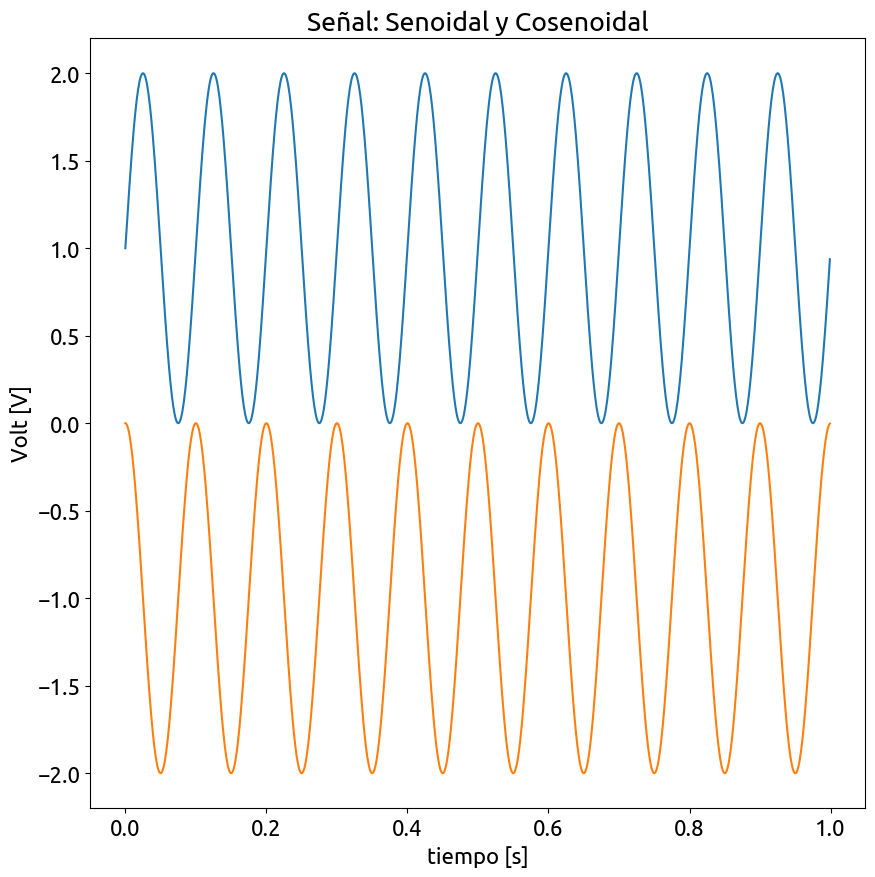

In [21]:
Signal0 = mi_funcion_sen(vmax, dc+1, ff, ph*0, nn, fs)
Signal1 = mi_funcion_cos(vmax, dc-1, ff, ph*0, nn, fs)

plt.plot(Signal0[0], Signal0[1])
plt.plot(Signal1[0], Signal1[1])
plt.title('Señal: Senoidal y Cosenoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('Volt [V]')
plt.axis('tight')
plt.show() 


Señal step(t) o u(t)

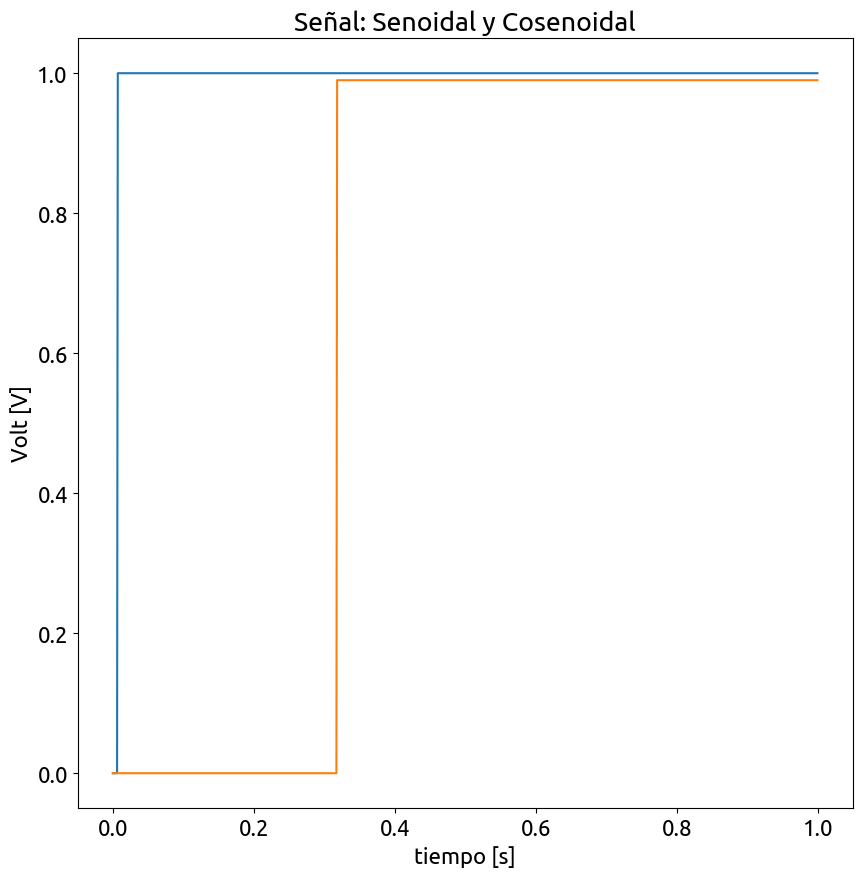

In [12]:
Signal0 = mi_funcion_step(vmax, dc, ff, ph*1, nn, fs)
Signal1 = mi_funcion_step(vmax*0.99, dc, ff, ph*40, nn, fs)

plt.plot(Signal0[0], Signal0[1])
plt.plot(Signal1[0], Signal1[1])
plt.title('Señal: Senoidal y Cosenoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('Volt [V]')
plt.axis('tight')
plt.show() 

Señal tipo rampa con defasaje y sin defasaje.

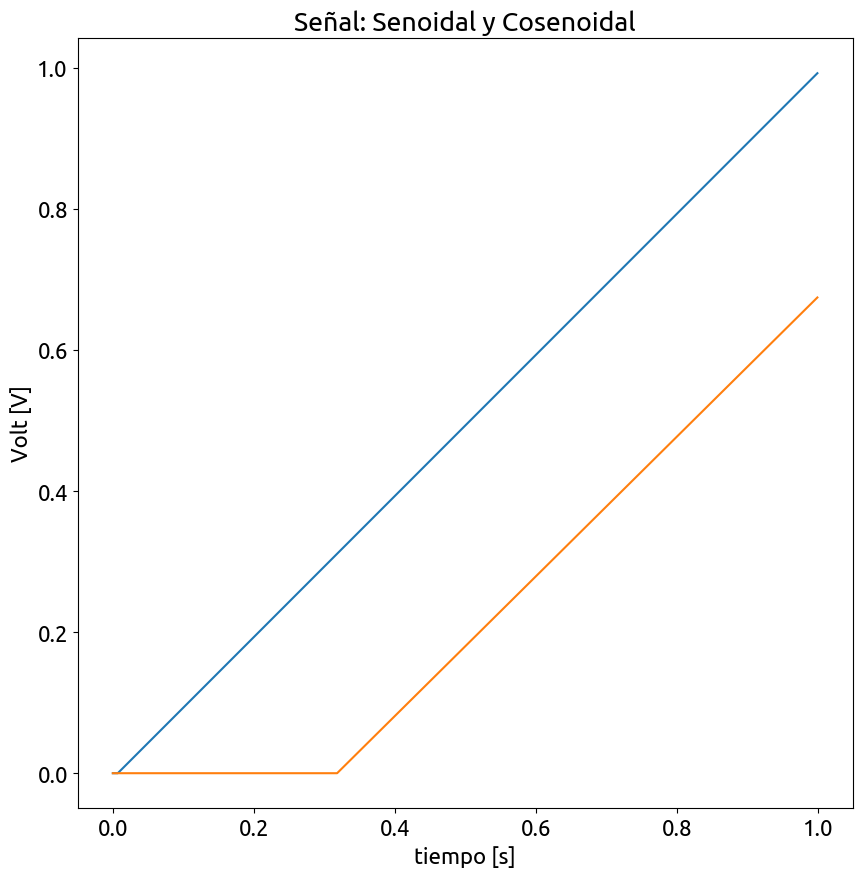

In [13]:
Signal0 = mi_funcion_ramp(vmax, dc, ff, ph*1, nn, fs)
Signal1 = mi_funcion_ramp(vmax*0.99, dc, ff, ph*40, nn, fs)

plt.plot(Signal0[0], Signal0[1])
plt.plot(Signal1[0], Signal1[1])
plt.title('Señal: Senoidal y Cosenoidal')
plt.xlabel('tiempo [s]')
plt.ylabel('Volt [V]')
plt.axis('tight')
plt.show() 

A continuacion mostramos una convinacion de la señal tipo rampa y un pulso restando un escalon defasado a un escalon sin defasaje.

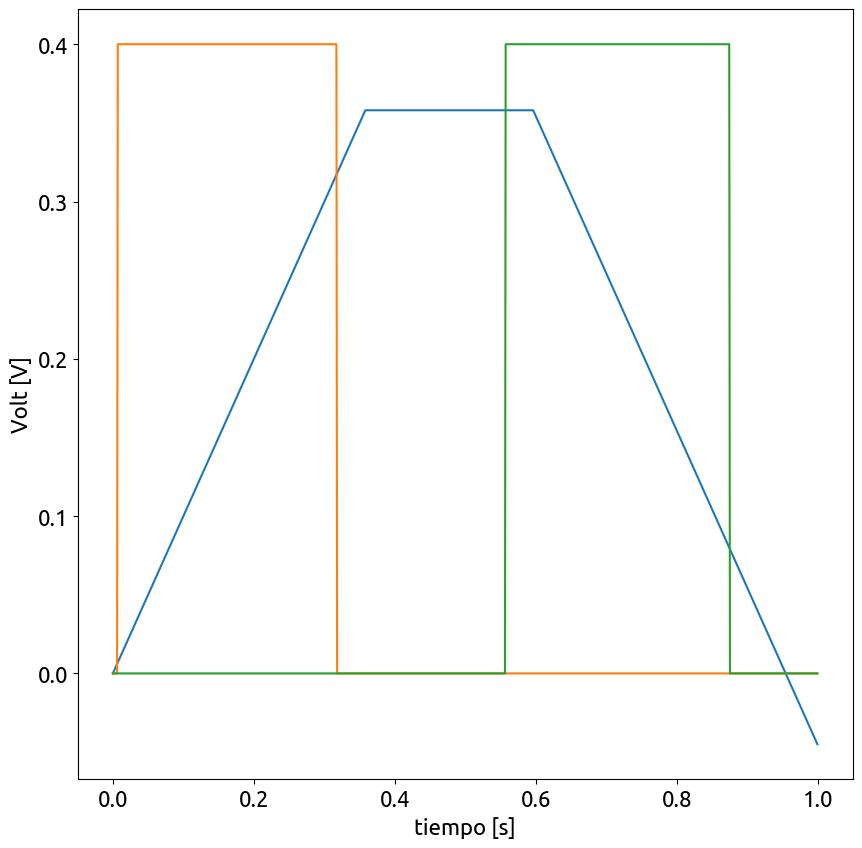

In [25]:
Signal0 = mi_funcion_ramp(vmax, dc, ff, ph*0, nn, fs)
Signal1 = mi_funcion_ramp(vmax, dc, ff, ph*45, nn, fs)
Signal2 = mi_funcion_ramp(vmax, dc, ff, ph*75, nn, fs)

Signal3 = mi_funcion_step(vmax*0.4, dc, ff, ph*1, nn, fs)
Signal4 = mi_funcion_step(vmax*0.4, dc, ff, ph*40, nn, fs)

Signal5 = mi_funcion_step(vmax*0.4, dc, ff, ph*70, nn, fs)
Signal6 = mi_funcion_step(vmax*0.4, dc, ff, ph*110, nn, fs)



plt.plot(Signal0[0], Signal0[1]-Signal1[1]-Signal2[1])
plt.plot(Signal3[0],Signal3[1]-Signal4[1])
plt.plot(Signal5[0],Signal5[1]-Signal6[1])
plt.xlabel('tiempo [s]')
plt.ylabel('Volt [V]')
plt.axis('tight')
plt.show() 


# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online](http://nbviewer.jupyter.org/github/marianux/pdstestbench/blob/master/notebook0.ipynb).